## Исследование данных о российском кинопрокате

Основная цель проекта:
- Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Краткое описание данных:

У нас имеются две таблицы с описанием фильмов. Названия картин, их прокатные удостоверения, даты премьер, показатели возвратной и невозвратной государственной поддержки, жанры и типы фильмов, студия , режиссеры, и государства создания фильмов, также имеется информация о потраченном бюджете команд фильмов, рейтинги и кассовые сборы фильмов в кинотеатрах. 

Содержание данных:

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` _—_ объём возвратных средств государственной поддержки;
`nonrefundable_support` _—_ объём невозвратных средств государственной поддержки;
- `financing_source` _—_ источник государственного финансирования;
- `budget` _—_ общий бюджет фильма;
- `ratings` _—_ рейтинг фильма на КиноПоиске;
- `genres` _—_ жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

Информация в датафрейме опубликованна на [портале открытых данных Министерства культуры](http://opendata.mkrf.ru/) и на сайте "Кинопоиск".

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies`(data_movies) обязательно вошли в получившийся датафрейм. 

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
# указываем ссылки из облачного хранилища
movies_id = '1TDFPuLaiSZuQk4q7iC-RPR7vBYbnBBtf'
movies_url = 'https://drive.google.com/uc?id=' + movies_id

shows_id = '1v1cN5z9OVueNvFAAX8sSWWz82yiMtPHx'
shows_url = 'https://drive.google.com/uc?id=' + shows_id

# загружаем данные о фильмах
data_movies = pd.read_csv(movies_url)
#display(data_movies.head())

# загружаем данные о показах
data_shows = pd.read_csv(shows_url)
#display(data_shows.head())

In [3]:
# выводим общую информацию о таблице с фильмами
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# выводим общую информацию о таблице с показами
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
# выведем первые пять строк каждой таблицы
display(data_movies.head())
data_shows.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


##### Объеденим две таблицы в одну для удобства анализа

In [6]:
# В стобце найдена строка не подходящая для изменения типа, поэтому нам необходимо её удалить
#display(data_movies[data_movies['puNumber'] == 'нет'])
data_movies = data_movies.loc[data_movies['puNumber'] != 'нет']
data_movies[data_movies['puNumber'] == 'нет']

# Мы меням тип столбца по которому будем проводить объединение таблиц
data_movies['puNumber'] = data_movies['puNumber'].astype(int)
#data_movies.info()

# Приступаем к объединению таблиц
data = data_movies.merge(
    data_shows, on= 'puNumber', how='left'
)
data.info()

# проверим длину таблиц
print(f'Длина таблицы с фильмами = {len(data_movies)}')
print(f'Длина таблицы с показами = {len(data_shows)}')
print(f'Длина итоговой таблицы = {len(data)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Мы объединили таблицы сохранив все строки из таблицы с фильмами

### Шаг 2. Предобработка данных

Проверим типы данных

In [7]:
display(data.head())
data.info()
data['show_start_date'].sample(15) 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

4699    2010-12-21T12:00:00.000Z
2644    2015-07-20T12:00:00.000Z
5393    2011-11-23T12:00:00.000Z
1679    2013-12-27T12:00:00.000Z
2073    2015-02-06T12:00:00.000Z
7222    2019-09-23T12:00:00.000Z
6198    2018-09-03T12:00:00.000Z
5686    2018-01-11T12:00:00.000Z
6595    2019-01-19T12:00:00.000Z
6849    2019-04-11T12:00:00.000Z
2254    2014-09-10T12:00:00.000Z
3664    2016-09-13T12:00:00.000Z
2206    2016-05-30T12:00:00.000Z
6123    2018-08-10T12:00:00.000Z
2083    2015-02-17T12:00:00.000Z
Name: show_start_date, dtype: object

**Наблюдение:
У нас 11 столбцов с типом данных object. В некоторых из них хранятся категориальные переменные, названия фильмов, имена авторов и так далее.**

Изучим отдельно некоторые столбцы:


In [8]:
# изучим столбец со временем
display(data['show_start_date'].unique())

# изучим столбец с возрастным рейтингом фильма
data['ratings'].unique()

array(['2015-11-27T12:00:00.000Z', '2016-09-13T12:00:00.000Z',
       '2016-10-10T12:00:00.000Z', ..., '2019-12-24T12:00:00.000Z',
       '2019-12-28T12:00:00.000Z', '2019-12-30T12:00:00.000Z'],
      dtype=object)

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)


*Задчи:*
* Изменим тип данных в столбце 'show_start_date', так как в столбце указано время, которое должно соответствовать типу DateTime.

* В столбце `rating` числовые столбцы указаны в строковом типе, также указаны проценты, поэтому исправим эти ошибки.

In [9]:
# Конвертация строк в даты с учетом временной зоны
data['show_start_date'] = pd.to_datetime(
	data['show_start_date'], 
	format='%Y-%m-%dT%H:%M:%S.%fZ', 
	errors='coerce', 
	utc=True
)

# Удаление временной зоны
data['show_start_date'] = data['show_start_date'].dt.tz_localize(None)

#data['ratings'] = data['ratings'].astype('float')'''
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
# убираем ошибки в столбце `ratings`:
data['ratings'] = data['ratings'].str.rstrip('%').astype(float)

data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

**Вывод:**

Мы изменили тип данных в столбце `show_start_date` и `ratings`.

#### Шаг 2.2. Пропуски в датафрейме

In [12]:
# общее колимчество пропусков в каждом столбце
print(data.isna().sum())

# общее количество строк в таблице
print(f' Количество строк в DataFrame = {len(data)}')

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64
 Количество строк в DataFrame = 7485


In [13]:
# выведем процент пропусков в каждом столбце
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('Reds')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


*Задачи:*
Ряд строк мы удалим, а именно в столбцах: `film_studio`,`production_country`,`director`. Удаляем мы их, так как количество пропусков в них очень мало, относительно общего количества строк в датафрейме (не более 0.5% в каждом столбце). 
В трех других столбцах (refundable_support, nonrefundable_support, budget), пропусков достаточно много (95%). 

Если мы посмотрим на четыре связанных между собой столбца: 
1. refundable_support
2. nonrefundable_support
3. budget
4. financing_source, 
 то уивдим, что количесвто пропусков в этих столбцах одинаково. 
 
Это может быть связанно с тем, что данные фильмы не получали никакой финансовой поддержки от государства, поэтому нет информации о сумме возвратных и безвозвратных средств, об общем бюджете финансовой поддержки и источнике государственного финансирования. Значит пропуски в этих столбцах вполне логичны, поэтому в столбце `financing_source` мы укажем что у таких фильмов `нет финансирования`.

In [14]:
# удаляем строки с пропусками в вышеуказанных столбцах
data = data.dropna(subset= ['film_studio','production_country', 'director'])

# заполняем пропущенные значения в столбце 'financing_source'
data['financing_source'] = data['financing_source'].fillna('нет финансирования')
print(data.isna().sum())
print(len(data))

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source            0
ratings                   947
genres                    956
box_office               4303
dtype: int64
7458


#### Шаг 2.3. Дубликаты в датафрейме

In [15]:
print( f'Количество явных дубликатов = {data.duplicated().sum()}')

Количество явных дубликатов = 0


Как мы выяснили явных дубликатов в DataFrame нет, при поиске явных дубликатов важно учитывать, что у одного и того же фильма может быть несколько прокатных удостоверений, а значит и строчки будут повторятся. Но каждое прокатное удостоверение относится лишь к одному фильму, значит будем проверять именно по столбцу 'puNumber'

In [16]:
# найдем количество совпадений по столбцу
print(f"Количество совпадений по столбцу `puNumber` = {data.duplicated(subset='puNumber').sum()}")
display(data['puNumber'].value_counts().head())

# удаляем совпадения
data = data[data['puNumber'] != 221154310]

# проверка 
# display(data['puNumber'].value_counts().head())

Количество совпадений по столбцу `puNumber` = 2


puNumber
221054410    2
221154310    2
121010811    1
221049511    1
221049411    1
Name: count, dtype: int64

Стоит также проверить совпадения и в других столбцах, проверим конкретно столбец с названием фильма `title`.

In [17]:
print(f"Количество строк с совпадениями по столбцу с названием фильма = {data.duplicated(subset='title').sum()}")

Количество строк с совпадениями по столбцу с названием фильма = 711


In [18]:
display(data[data.duplicated(subset=['title'])].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,нет финансирования,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,нет финансирования,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет финансирования,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет финансирования,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет финансирования,8.2,"фэнтези,приключения,семейный",1125302.0


Мы выяснили, что в таблице 711 строк с совпадениями в названии, удалим все дубликаты. Мы будем удалять все строки оставляя только первое вхождение строк.

In [19]:
# удалим строки оставив первое вхождение
data = data.drop_duplicates(subset='title',keep='first')

# проверяем результат
print(data.duplicated(subset='title').sum())

0


#### Шаг 2.4. Категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

У нас в таблице несколько категориальных столбцов: 
1. type
2. age_restriction
3. financing_source

In [20]:
print(data['type'].value_counts())
print()
print(data['age_restriction'].value_counts())
print()
data['financing_source'].value_counts()

type
Художественный                3923
 Художественный               1345
Анимационный                   766
Прочие                         385
Документальный                 275
Научно-популярный               49
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

age_restriction
«16+» - для детей старше 16 лет           2510
«12+» - для детей старше 12 лет           1471
«18+» - запрещено для детей               1423
«0+» - для любой зрительской аудитории     741
«6+» - для детей старше 6 лет              600
Name: count, dtype: int64



financing_source
нет финансирования                  6416
Министерство культуры                163
Фонд кино                            144
Министерство культуры, Фонд кино      22
Name: count, dtype: int64

В различных значениях столбца 'type' есть ошибки и повторения. А значения столбца 'age_restriction' заменим на итак общеизвестные и общепонятные обозначения (6+, 0+ и так далее)

In [21]:
wrong_names = [' Художественный',' Анимационный']
right_names = ['Художественный', 'Анимационный']
data['type'] = data['type'].replace(wrong_names,right_names)

wrong_age = [
    '«16+» - для детей старше 16 лет', 
    '«18+» - запрещено для детей', 
    '«12+» - для детей старше 12 лет', 
    '«0+» - для любой зрительской аудитории', 
    '«6+» - для детей старше 6 лет'
]

right_age = [
    '16+',
    '18+',
    '12+',
    '0+',
    '6+'
]

data['age_restriction'] = data['age_restriction'].replace(wrong_age,right_age)
print(data['type'].value_counts())
data['age_restriction'].value_counts()

type
Художественный                5268
Анимационный                   767
Прочие                         385
Документальный                 275
Научно-популярный               49
Музыкально-развлекательный       1
Name: count, dtype: int64


age_restriction
16+    2510
12+    1471
18+    1423
0+      741
6+      600
Name: count, dtype: int64

#### Шаг 2.5. Количественные значения

Столбцы с количественными значениями у нас:
1. refundable_support
2. nonrefundable_support
3. budget

In [22]:
# создаем копию датафрейма без одновременных пропусков в количественных столбцах
data_new = data.dropna(subset = ['refundable_support', 'nonrefundable_support', 'budget'])

# количество строк с бюджетом в 0
data_new[data_new['budget']==0.0].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Данные в столбце budget расходятся с суммой данных из столбцов `refundable_support` и `nonrefundable_support`, также есть строки где указанны данные возвратной и невозвратной поддержки, а общий бюджет меньше, именно в таких строках мы и будем заменять показатели `refundable_support` budget на сумму показателей из `refundable_support` и `nonrefundable_support`.

In [23]:
'''строим функцию, которая среди строк где общий бюджет меньше
   суммы значений указанных в столбцах поддержки, изменит значения бюджета'''

def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        row['budget'] = row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

# применяем фугкцию к датафрейму
data['correct_budget'] = data.apply(correct_budget, axis=1)

# проверяем
data[data['correct_budget'] < (data['refundable_support'] + data['nonrefundable_support'])].count()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
correct_budget           0
dtype: int64

**Вывод:**

Мы создали новый столбец в дата-фрейме, который содержит информацию о сумме показателей таких столбцов как `refundable_support` и `nonrefundable_support` при условии что показатель в столбце `budget` меньше чем сумма вышеуказанных столбцов.

#### Шаг 2.6. Создаем новые столбцы

- Создадим столбец с информацией о годе проката.

In [24]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,correct_budget,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,нет финансирования,7.2,"боевик,драма,мелодрама",NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,NaN,NaN,NaN,нет финансирования,6.6,"драма,военный",NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет финансирования,6.8,"фантастика,боевик,триллер",NaN,NaN,2016
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,6+,NaN,NaN,NaN,нет финансирования,7.7,драма,NaN,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,12+,NaN,NaN,NaN,нет финансирования,8.3,"мелодрама,комедия",2700.0,NaN,2013


- Создадим два новых столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [25]:
# создаем функцию для заполнения нового столбца
def new_col(col_name, new_name):
    data[new_name] = data[col_name].str.split(',').str[0]
    data[new_name] = data[new_name].str.strip()
    return 

# применям  функцию и проверяем результат
new_col('director', 'main_director')
#data.head(20)
new_col('genres', 'main_genres')
#data.head(20)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Важно помнить, что верные показатели бюджета указанны именно в столбце `correct_budget`.

In [26]:
# создаем столбец с долей гос. поддержки
data['budget_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['correct_budget']
#data[data['correct_budget'] >= 0]
#data.info()
data['budget_share'].describe()

count    329.000000
mean       0.542518
std        0.197433
min        0.044043
25%        0.384615
50%        0.615385
75%        0.661977
max        1.000000
Name: budget_share, dtype: float64

**Вывод:**

Мы создали столбцы:
- с годом проката
- с именем и фамилией главного режиссера
- с основным жанром фильма
- с долей государственной поддержки в общем бюджете фильма

### Шаг 3. Исследовательский анализ

#### Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

In [27]:
# посчитаем количество фильмов для каждого года
data.groupby('year')['title'].count()

year
2010    757
2011    475
2012    516
2013    589
2014    728
2015    661
2016    770
2017    498
2018    864
2019    887
Name: title, dtype: int64

Мы указали сколько фильмов в нашем датафрейме соответствуют тому или иному значению года от 2010 по 2019. О прокате в кинотеатрах будут указывать данные о сборах фильма (`box_office`)

In [28]:
print(f"Количество строк в датафрейме / всего фильмов нашей таблице = {len(data['box_office'])}")

print(f"Количество фильмов с известной информацией о прокате в кинотеатрах = {len(data['box_office']) - data['box_office'].isna().sum()}")

print(f"Количество фильмов без известной информации о прокате в кинотеатрах = {data['box_office'].isna().sum()}")

print(f"Доля фильмов имеющих информацию о прокате = {round((len(data['box_office']) - data['box_office'].isna().sum()) / len(data['box_office']), 2)}")

print(f"Доля фильмов не имеющих информацию о прокате = {round(data['box_office'].isna().sum() / len(data['box_office']),2)}")

Количество строк в датафрейме / всего фильмов нашей таблице = 6745
Количество фильмов с известной информацией о прокате в кинотеатрах = 3014
Количество фильмов без известной информации о прокате в кинотеатрах = 3731
Доля фильмов имеющих информацию о прокате = 0.45
Доля фильмов не имеющих информацию о прокате = 0.55


In [29]:
movies_in_cinema = data.groupby('year')['box_office'].count()
movies_in_cinema = movies_in_cinema.to_frame().reset_index()
#display(movies_in_cinema)

movies_info = data.groupby('year')['title'].count()
movies_info = movies_info.to_frame().reset_index()

movies_info['фильмы в прокате'] = movies_in_cinema['box_office']
movies_info['доля фильмов в прокате']=(movies_info['фильмы в прокате']/movies_info['title'])*100

display(movies_info.style.background_gradient('Reds'))

fig = px.line(
	movies_info,
	x=movies_info['year'],
	y=movies_info['доля фильмов в прокате'],
	labels={'x':'Годы', 'y':'Доля фильмов'},
	title="Доля фильмов в прокате по каждому году",
	markers=True
)
fig.show()

,year,title,фильмы в прокате,доля фильмов в прокате
0,2010,757,88,11.624835
1,2011,475,98,20.631579
2,2012,516,115,22.286822
3,2013,589,176,29.881154
4,2014,728,257,35.302198
5,2015,661,431,65.204236
6,2016,770,500,64.935065
7,2017,498,356,71.485944
8,2018,864,471,54.513889
9,2019,887,522,58.850056


**Вывод:**

Мы выяснили, что во всем датафрейме, доля фильмов с известной нам информацией о прокате состаявляет ~ 0.42.
Также вывели новую таблицу с общей информацией по количеству фильмов по каждому году (как с информацией о прокате фильма, так и без информации), с колиечеством фильмов с информацией о прокате по каждому году и их долю от общего числа фильма за определенный год.
По выведенной гистограмме и информации таблицы можно сказать, что фильмы, выпущенные в период с 2015 по 2019, имеют куда больший процент показов в кинотеатрах чем фильмы выпущенные в другие периоды времени.

#### Динамика проката по годам. Выделим минимальные и максимальные значения.

In [30]:
# покажем изменения суммы сборов по каждому году 
box_office_sum = data.groupby('year')['box_office'].agg('sum')
box_office_sum = box_office_sum/10e5

# выводим показатель с градиентом
display(pd.DataFrame(box_office_sum).style.background_gradient('Reds'))

# создаем датафрейм для plotly
box_office_sum_df = box_office_sum.reset_index()

# строим линейный график динамики изменения показателя
fig = px.line(
	box_office_sum_df,
    x='year', 
	y='box_office', 
    title='Динамика изменения суммы кассовых сборов по годам',
	labels={'year':'Год', 'box_office':'Сумма кассовых сборов'},
    markers=True
)

# выводим график
fig.show()

# также построим столбчатую диаграмму
fig1 = px.bar(
	box_office_sum_df,
	x='year',
	y='box_office',
	title='Динамика изменения суммы кассовых сборов по годам',
	labels={'year':'Год', 'box_office':'Сумма кассовых сборов'}
)

fig1.show()

,box_office
year,
2010,2.374340
2011,13.944390
2012,6.420761
2013,29.768531
2014,7372.598572
2015,32084.649858
2016,43731.250162
2017,48561.554267
2018,47970.952311


**Вывод:**

Исходя из полученных данных максимальную сумму кассовых сборов удалость получить в 2017 году. Тройку лидеров в указанном промежутке по сумме касовых сборов занял период с 2017 по 2019 годы. Самое минимальное значение суммы было в 2010 году, однако в прошлом пункте работы я указывал, что самый большой процент показов в кинотеатрах приходится на период с 2015 по 2019 года, поэтому если брать минимум из этого периода времени, то самым минимальный показатель приходится на 2015 год.

То есть:
- максимальное значение кассовых сборов - 2017 год
- минимальное значение кассовых сборов - 2010 год
- минимальное значение в период самых больших показов в кино - 2015 год.

#### Средняя и медианная сумма сборов по годам.

In [31]:
# создаем таблицу со средним значением кассоувых сборов по годам
avg_box_office = data.groupby('year')['box_office'].mean().round().reset_index()  # округлили значения

# создаем таблицу с медианным значениям суммы кассовых сборов по годам
median_box_office = data.groupby('year')['box_office'].median().round().reset_index() # окрглили значения

# создаем сабплоты
fig = make_subplots(rows=1, cols=2, subplot_titles=('Средняя сумма кассовых сборов по годам', 'Медианная сумма кассовых сборов по годам'))

# создаем график для среднего
fig.add_trace(
	go.Bar(
		x = avg_box_office['year'], # годы
		y = avg_box_office['box_office'], # средняя сумма
		name='Средняя сумма кассовых сборов'),
	row=1, col=1
)
# дополним подписи на осях
fig.update_xaxes(title_text="Годы", row=1, col=1)
fig.update_yaxes(title_text="Средняя сумма", row=1, col=1)

# создаем график для медианны
fig.add_trace(
	go.Bar(
		x = median_box_office['year'], # годы
		y = median_box_office['box_office'], # медианная сумма
		name='Медианная сумма кассовых сборов'
		), row=1, col=2
)
# дополняем подписи на осях
fig.update_xaxes(title_text="Годы", row=1, col=2)
fig.update_yaxes(title_text="Медианная сумма", row=1, col=2)

# задает общее название графикам
fig.update_layout(title_text='Динамика средней и медианной суммы кассовых сборов по годам')
fig.show()

**Вывод:**

Мы посчитали среднюю и медианную сумму кассовых сборов по каждому году с 2010 по 2019 года, также софрмировали граффики как менялись данные показатели по каждому году.

В 2017 году было запущено в прокат больше всего фильмов, средняя сумма и медианна в этот же год самые высокие, что связанно как рас таки с долей фильмов в прокате. Однако, эта зависимость не для всего периода.

#### Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

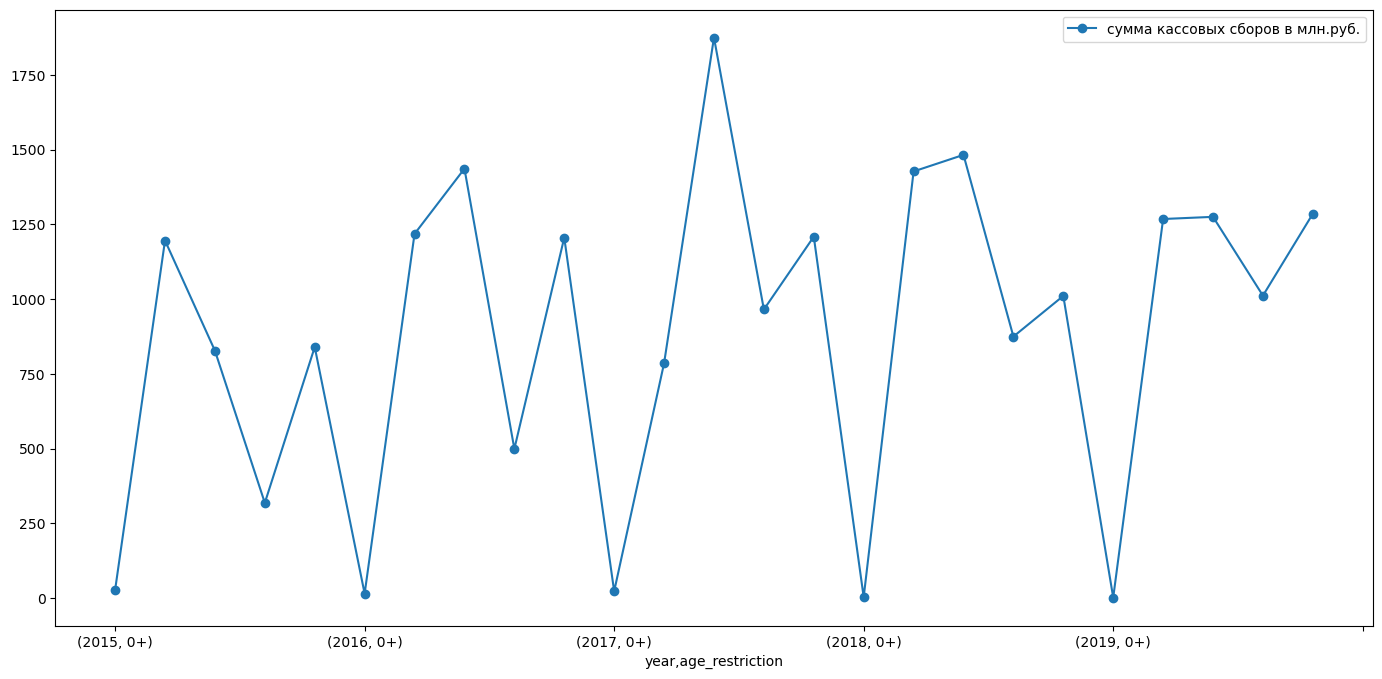

In [32]:
data_age_box = data.query('year >= 2015').pivot_table(index= ['year', 'age_restriction'], values= 'box_office', aggfunc='sum')
data_age_box['box_office'] = data_age_box['box_office']/10000000
data_age_box.rename(columns ={'box_office':'сумма кассовых сборов в млн.руб.'}, inplace=True)
display(data_age_box.style.background_gradient('Reds'))

data_age_box.plot(figsize = (17,8), style = 'o-')
plt.show()

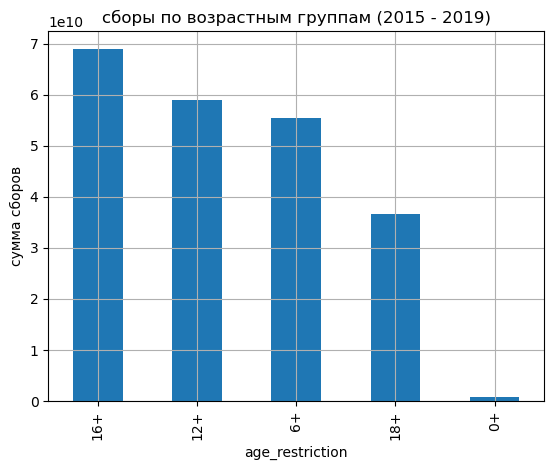

In [33]:
# сумма кассовых сборов по возрастным группам
data.query('year >= 2015').groupby('age_restriction')['box_office'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('сборы по возрастным группам (2015 - 2019)')
plt.ylabel('сумма сборов')
plt.show()

**Вывод:**

Особой популярностью в сумме за весь период времени пользуются фильмы с возрастным ограничением в 16+ и 12+. В период с 2016 по 2018 год самыми популярными были фильмы именно с рейтингом 16+. Объяснить подобную закономерность можно тем, что обычно фильмы или мультфильмы с такими возрастными ограничениями как 12+ и 16+ посещают семьи и подростки. Также исходя из полученных данных мы можем увидеть закономерные падения на отметке в 18+ каждый год. Что явно говорит о низкой популярности фильмов с таким возрастным ограничением. Самый же низкий показатель у фильмов с возрастным ограничением 0+, обычно это мультипликационные фильмы расчитанные на детей, которые собственно ребенок зачастую не может посетить без родителей (так как возраст таких детей от 0 до 10 лет), с этим и связанна низкая посещаемость подобных картин в кинотеатрах.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку.

In [34]:
# Создаём копию среза, чтобы избежать предупреждения
support_data = data.loc[data['refundable_support'].notna() | data['nonrefundable_support'].notna()].copy()

# Добавление нового столбца к копии, а не к виду
support_data['support_sum'] = support_data['refundable_support'] + support_data['nonrefundable_support']

support_sum = support_data.groupby('year')['support_sum'].sum() / 1e9
support_sum_df = support_sum.reset_index()
display(support_sum_df.style.background_gradient('Reds'))

fig = px.line(
	support_sum_df,
	x='year',
	y='support_sum',
	labels={'year':'Год','support_sum':'Сумма господдержки'},
	title='Динамика гос.поддержки по годам',
	markers=True
)
fig.show()

,year,support_sum
0,2013,0.134348
1,2014,0.572002
2,2015,3.656241
3,2016,4.303155
4,2017,3.183972
5,2018,3.446969
6,2019,4.349000


1. Мы вывели изменение суммы государственной поддержки по годам, как мы можем видеть данные представленны только с 2013 года, что говорит нам об отсутствии данных о спонсировании фильмов выпущенных до 13года. С 13 года до 16 года наблюдается особенный рост, далее идет спад и движение к максимуму. Максимальное значение государственной поддержки было в 2019 году.

In [35]:
# счтроим новые срезы для визуализации
support_sum_by_year = support_data.groupby('year')['support_sum'].sum().reset_index()
budget_sum_by_year = support_data.groupby('year')['correct_budget'].sum().reset_index()

# график государственной поддержки
fig.add_trace(go.Scatter(x=support_sum_by_year['year'], 
                         y=support_sum_by_year['support_sum'], 
                         mode='lines+markers', 
                         name='Гос. поддержка',
                         line=dict(shape='linear', dash='solid')))

#график кассовых сборов
fig.add_trace(go.Scatter(x=budget_sum_by_year['year'], 
                         y=budget_sum_by_year['correct_budget'], 
                         mode='lines+markers', 
                         name='Кассовые сборы',
                         line=dict(shape='linear', dash='solid')))

# подписи осей
fig.update_layout(title='Сравнение государственной поддержки и кассовых сборов по годам',
                  xaxis_title='Год',
                  yaxis_title='Сумма',
                  template='plotly')

# вывод
fig.show()

2. Мы вывели таблицу с показателями изменения суммы государственной поддержки по годам, на основе которой был сформирован график, демонсрирующий общий путь изменений. Исходя из данных представленных на графике можно сказать, что общая закономерность и динамика наблюдается лишь в период с 13 года по 16 год. Именно в этот период времени государственная поддержка и сумма кассовых сборов увеличивались паралельно. В показателях кассовых сборов динамика сохранялась растущей до 17 года, после чего пошла на спад. Также стоит сказать, что сумма кассовых сборов практически всегда превышала сумму государственной поддержки, не считая показателей за 2013 год.

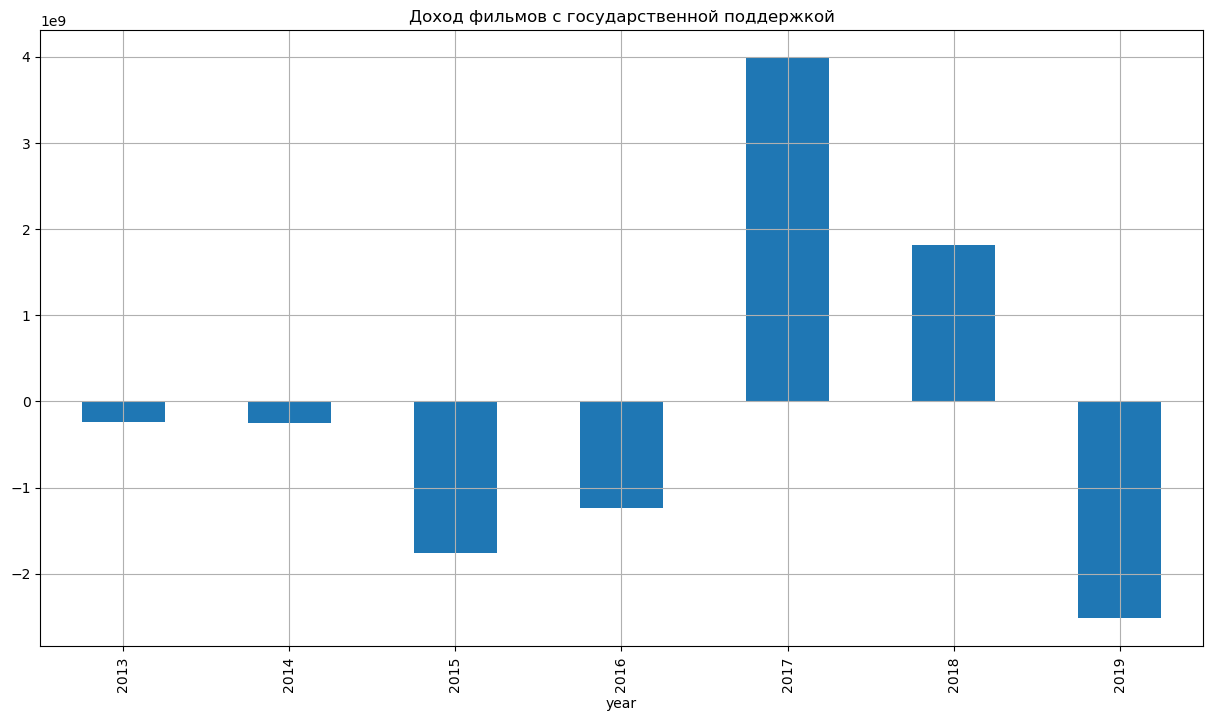

In [36]:
# датафрейм со строками без пропусков в столбце `budget` 
budget = data[data['correct_budget'].notna()].copy()
#budget[budget['box_office'].isna()]
budget = budget[budget['box_office'].notna()]
#budget[budget['box_office'].isna()]
budget = budget[budget['ratings'].notna()]

# сумма государственной поддержки
budget['sum_support'] = budget['refundable_support'] + budget['nonrefundable_support']
# разность кассовых сборов и общего бюджета фильма, то есть общий доход фильма
budget['income'] = budget['box_office'] - budget['correct_budget']

budget.groupby('year')['income'].sum().plot(kind='bar', title = 'Доход фильмов с государственной поддержкой', grid = True, figsize=(15,8))
plt.show()

3. Мы вывели столбчатую диаграмму в которой продемонстрирован общий доход фильмов по годам. В качестве дохода мы расчитали разность кассовых сборов фильмов и общего бюджета этих фильмов. Как мы можем видеть, в большей степени доходными стали фильмы выпущенные в 2017 и 2018 годах. Остальные фильмы потеряли в доходе относительно бюджета, больше всего потеряли в доходе фильмы выпущенные в 2019 году.

In [37]:
print(f"Корреляция между суммой поддержки и доходом фильма {budget['sum_support'].corr(budget['income'])}")

print(f"Корреляция между суммой поддержки и бюджетом фильма {budget['sum_support'].corr(budget['correct_budget'])}")

print(f"Корреляция между суммой дохода и суммой кассовых сборов {budget['income'].corr(budget['box_office'])}")

Корреляция между суммой поддержки и доходом фильма 0.09700914613609835
Корреляция между суммой поддержки и бюджетом фильма 0.7141819143120117
Корреляция между суммой дохода и суммой кассовых сборов 0.8319468052890169


Мы видим вполне объяснимые связи между суммой поддержки и бюджетом фильма, так как гос.поддержка явно является основной частью бюджета большинства фильмов.

(0.0, 200000000.0)

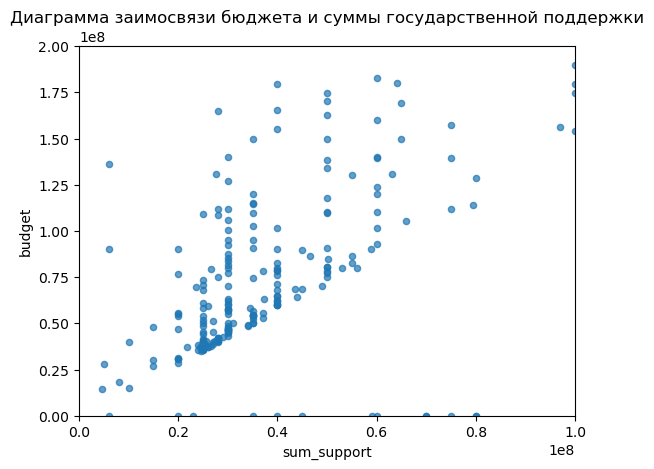

In [38]:
# строим диаграмму рассеивания
budget.plot(kind='scatter', x='sum_support', y='budget', alpha=0.7)
plt.title('Диаграмма заимосвязи бюджета и суммы государственной поддержки')
plt.xlim(0, 1e8)
plt.ylim(0, 0.2e9)

Также исходя из данных таблицы мы видим, что в датафрейме присудствует заимосвязь между доходами фильмов и суммой кассовых сборов.

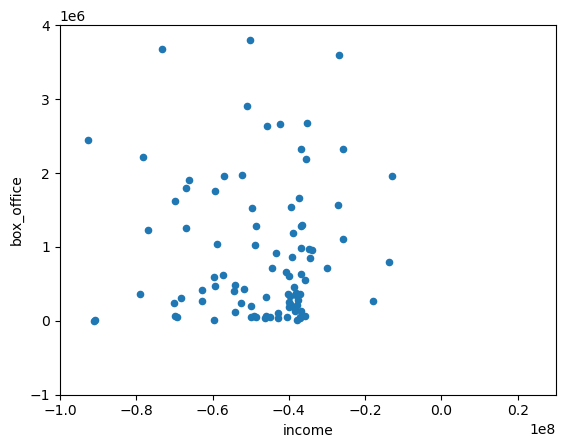

In [39]:
budget.plot(kind='scatter', x='income', y='box_office')
plt.xlim(-0.1e9,0.3e8)
plt.ylim(-0.1e7, 0.4e7)
plt.show()

Не смотря на весьма значительный показатель корелляции доходов и кассовых сборов (~0.83), на граффике она выражена нечетко.

**Вывод:**

У некоторых показателей датафрейма весьма большая корреляция что говорит нам о плотной заимосвязи аспектов. (доходы - кассовые сборы, бюджет - сумма государственной поддержки)

### Шаг 5. Общий вывод

#### Вывод данных

- мы объединили данные двух таблиц в одну
- вывели датафрейм 

#### Предобработка данных

- Изменили тип данных в столбце с датой и временем премьеры фильма
- Удалили и заменили пропуски в датафрейме
- Исправили ошибки и удалили дубликаты
- создали новые столбцы:
   -- 'correct_budget'
   -- 'year'
   -- 'main_director'
   -- 'main_genres'
   -- 'budget_share'

#### Исследовательский анализ данных

- фильмы, выпущенные в период с 2015 по 2019, имеют куда больший процент показов в кинотеатрах чем фильмы выпущенные в другие периоды времени. 

- в 2018 году была достигнута отметка максимальной суммы кассовых сборов, минимальное значение приходилось на 2010 год. Общая динамика положительная, с каждым годом сумма кассовых сборов росла.
   -- максимальное значение кассовых сборов - 2018 год
   -- минимальное значение кассовых сборов - 2010 год
   -- минимальное значение в период самых больших показов в кино - 2015 год.

- особой популярностью в сумме за весь период времени пользуются фильмы с возрастным ограничением в 16+ и 12+. В период с 2016 по 2018 год самыми популярными были фильмы именно с рейтингом 16+. Также, мы можем увидеть закономерные падения на отметке в 18+ каждый год. Самый же низкий показатель у фильмов с возрастным ограничением 0+.

- с 13 года до 16 года наблюдается особенный рост государственной поддержки фильмов, далее идет спад и снова движение к максимуму. Максимальное значение государственной поддержки было в 2019 году.

- сумма кассовых сборов практически всегда превышала сумму государственной поддержки, не считая показателей за 2013 год.

-  в большей степени доходными стали фильмы выпущенные в 2017 и 2018 годах. Остальные фильмы потеряли в доходе относительно бюджета, больше всего потеряли в доходе фильмы выпущенные в 2019 году.

В ходе исследовательского анализа мы выснили, что государственная поддержка фильмов с 2013 года росла, не смотря на это, не все фильмы с большой государственной поддержкой смогли окупить затраты благодаря кассовым сборам в кинотеатрах, хотя сама сумма этих сборов росла. Это говрит нам о росте бюджетов фильмов, который не соответстует росту кассовых сборов, однако динамика у обоих показателей положительна от года к году.

Рост количества показов фильмов в кино, также говорит нам о первоначальной цели руководств собрать больший процент сборов в кино. Если брать данную цель за основу, то можно сказать, что у большинства команд цель не была достигнута, так как сборы в кино не покрыли затраченного бюджета, кроме большинства фильмов выпущенных в 2017 и 2018 годах. 

Среди населения более популярными считаются картины с возрастным ограничением 16+ расчитанные на семейный просмотр и подростков.